# Can you help reduce employee turnover?

## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


## 💪 Competition challenge

Create a report that covers the following:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [2]:
df.columns

Index(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left'],
      dtype='object')

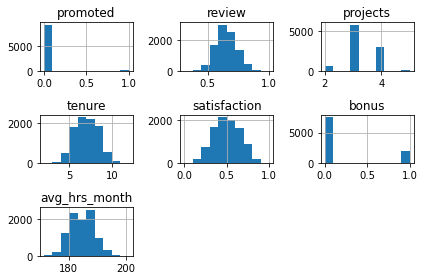

In [3]:
import matplotlib.pyplot as plt

df.hist()

plt.tight_layout()

Missing columns: `'deparment'`, `'salary'`, `'left'`

In [4]:
departments = sorted(set(df.department), key=lambda x: x.lower())

In [30]:
departments

['admin',
 'engineering',
 'finance',
 'IT',
 'logistics',
 'marketing',
 'operations',
 'retail',
 'sales',
 'support']

In [5]:
for i, dep in enumerate(departments):
    df.department = df.department.replace(dep, i)

In [6]:
df.salary = df.salary.replace('low', 0)
df.salary = df.salary.replace('medium', 1)
df.salary = df.salary.replace('high', 2)

In [7]:
df.left = df.left.replace('no', 0)
df.left = df.left.replace('yes', 1)

# Question 1

Which department has the highest employee turnover? Which one has the lowest?

In [26]:
df_left = df[df.left == 1]
df_stay = df[df.left == 0]

In [20]:
leave_counts = {
    dep: df_left[df_left.department == i].shape[0]
    for i, dep in enumerate(departments)
}

In [21]:
for k, v in sorted(leave_counts.items(), key=lambda x: x[1]):
    print('{:<20}: {}'.format(k, v))

IT                  : 246
logistics           : 249
finance             : 294
admin               : 304
support             : 523
marketing           : 559
retail              : 1070
engineering         : 1079
operations          : 1086
sales               : 1346


In [22]:
print("The department with the most turnover is: '{}' ({})".format(*max(leave_counts.items(), key=lambda x: x[1])))

The department with the most turnover is: 'sales' (1346)


In [23]:
print("The department with the least turnover is: '{} ({})'".format(*min(leave_counts.items(), key=lambda x: x[1])))

The department with the least turnover is: 'IT (246)'


# Question 2

Investigate which variables seem to be better predictors of employee departure.

In [57]:
df.corr()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
department,1.000000,0.001761,0.003410,0.002377,-0.004423,0.008386,-0.006741,0.001712,0.004321,0.003318
promoted,0.001761,1.000000,0.001879,0.010107,0.001039,0.001410,-0.011704,0.001072,-0.002190,-0.036777
review,0.003410,0.001879,1.000000,0.000219,-0.003665,-0.184133,-0.349778,-0.003627,-0.196096,0.304294
projects,0.002377,0.010107,0.000219,1.000000,-0.020884,0.022596,0.002714,0.002654,0.021299,-0.012408
salary,-0.004423,0.001039,-0.003665,-0.020884,1.000000,0.005097,-0.004510,-0.007137,0.007697,0.000943
tenure,0.008386,0.001410,-0.184133,0.022596,0.005097,1.000000,-0.146246,-0.000392,0.978618,0.010521
satisfaction,-0.006741,-0.011704,-0.349778,0.002714,-0.004510,-0.146246,1.000000,0.000704,-0.143142,-0.009721
bonus,0.001712,0.001072,-0.003627,0.002654,-0.007137,-0.000392,0.000704,1.000000,-0.000370,-0.011485
avg_hrs_month,0.004321,-0.002190,-0.196096,0.021299,0.007697,0.978618,-0.143142,-0.000370,1.000000,0.009008
left,0.003318,-0.036777,0.304294,-0.012408,0.000943,0.010521,-0.009721,-0.011485,0.009008,1.000000


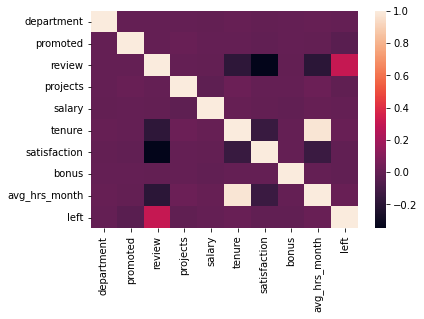

In [24]:
import seaborn as sns

ax = sns.heatmap(df.corr())

In [32]:
df_left.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
386,8,0,0.700577,4,1,5.0,0.484936,0,180.787350,1
785,8,0,0.738060,4,1,5.0,0.534547,0,179.534464,1
1078,8,0,0.600301,3,0,6.0,0.657108,0,182.426505,1
1155,6,0,0.722790,3,1,6.0,0.472769,0,181.921952,1
1190,9,0,0.679845,3,1,4.0,0.543203,0,177.469579,1


In [35]:
import itertools
list(itertools.chain.from_iterable(axes))

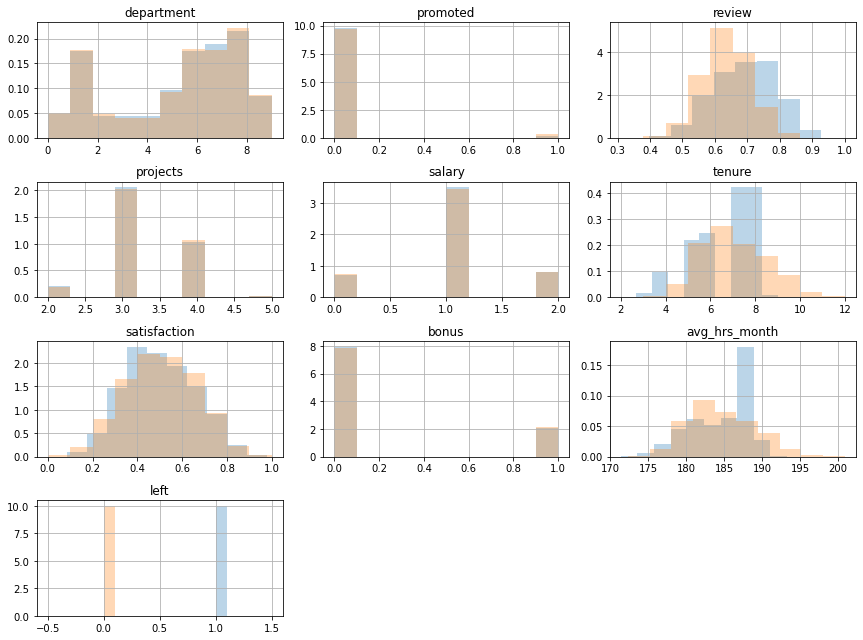

In [56]:
axes = df_left.hist(figsize=(12, 9), alpha=0.3, density=True)

df_stay.hist(figsize=(12, 9), ax=list(itertools.chain.from_iterable(axes))[:10], alpha=0.3, density=True)

plt.tight_layout()

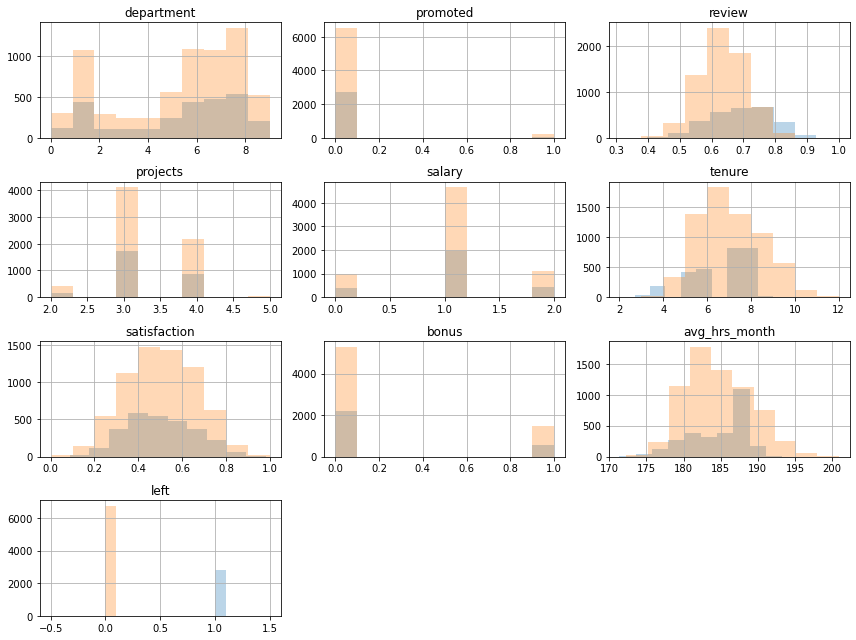

In [52]:
axes = df_left.hist(figsize=(12, 9), alpha=0.3)

df_stay.hist(figsize=(12, 9), ax=list(itertools.chain.from_iterable(axes))[:10], alpha=0.3)

plt.tight_layout()

Brainstorming:

* "Maybe they work too hard, then want to leave, but they get reviewed well because they worked so hard"
    * So is there a positive correlation between `'avg_hrs_month'` and `'review'`? No... actually, they're negatively correlated.
* Spring-board theory -- they're reviewed too well, they leave
* Start with a model using only `'review'`, `'tenure'`, `'avg_hrs_month'`, and `'satisfaction'`

In [50]:
df_left.avg_hrs_month.mean()

184.7197299534714

In [51]:
df_stay.avg_hrs_month.mean()

184.63760513877384